# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets

In [4]:
from google.colab import files
uploaded = files.upload()
customers = pd.read_csv('Customers.csv')

uploaded = files.upload()
products = pd.read_csv('Products.csv')

uploaded = files.upload()
transactions = pd.read_csv('Transactions.csv')

Saving Customers.csv to Customers (2).csv


Saving Products.csv to Products (1).csv


Saving Transactions.csv to Transactions.csv


# Display basic information about the datasets

In [5]:
print("Customers Dataset:")
print(customers.info())
print("\nProducts Dataset:")
print(products.info())
print("\nTransactions Dataset:")
print(transactions.info())

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          

# Converting dates to datetime format

In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Checking for missing values

In [7]:
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


 Exploratory Data Analysis (EDA)

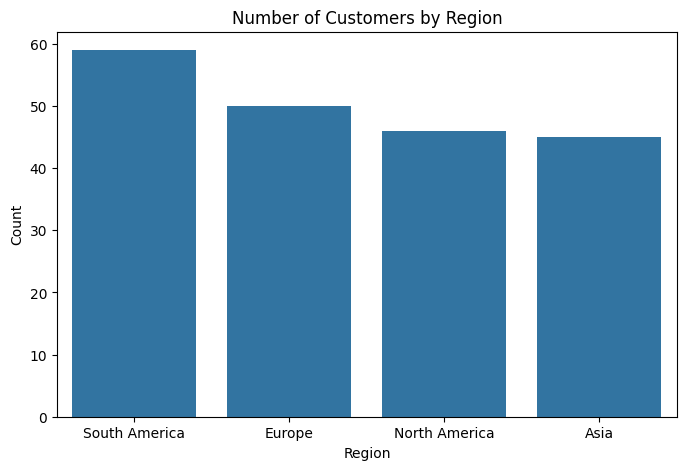

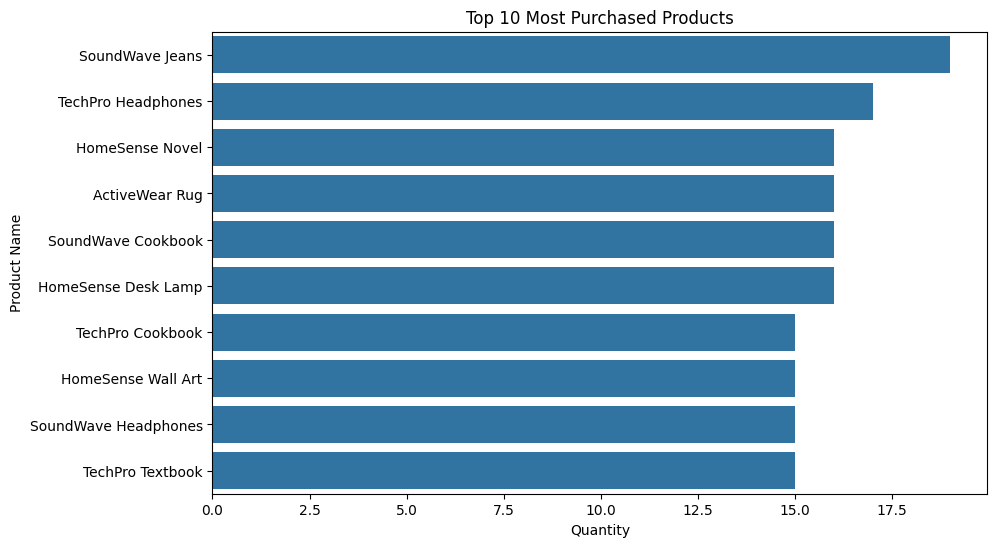

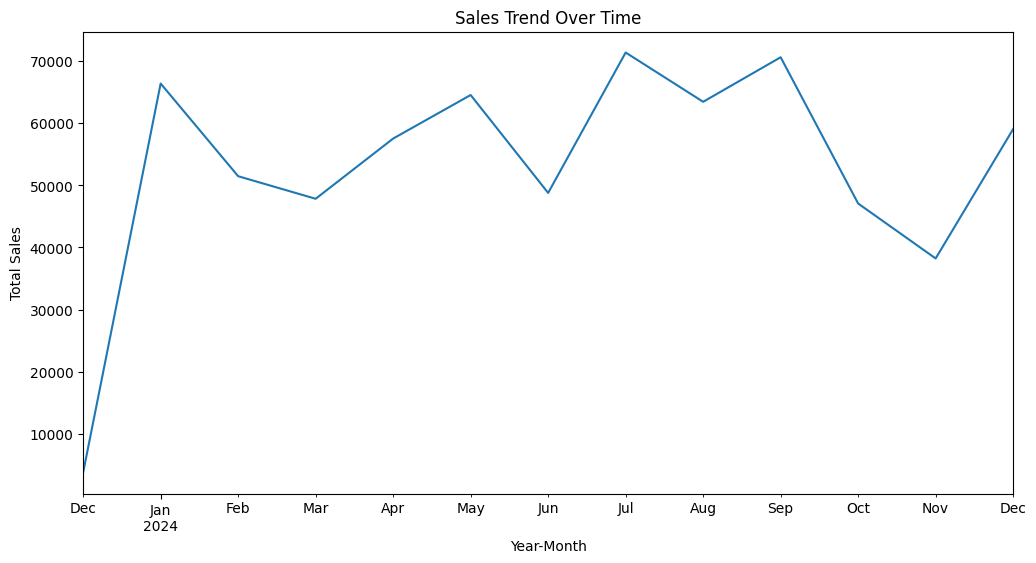

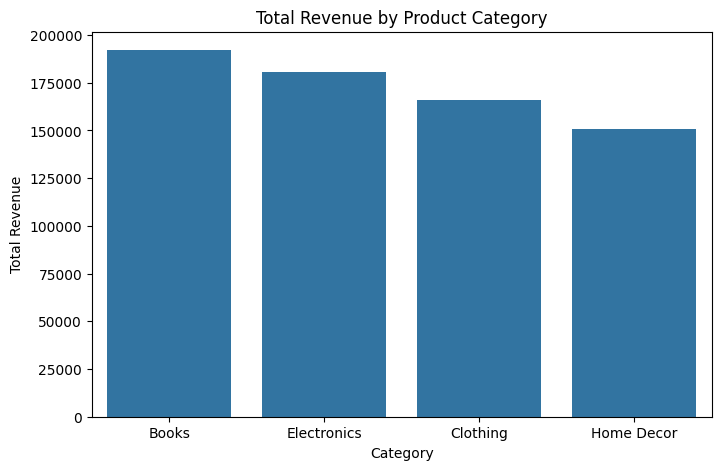

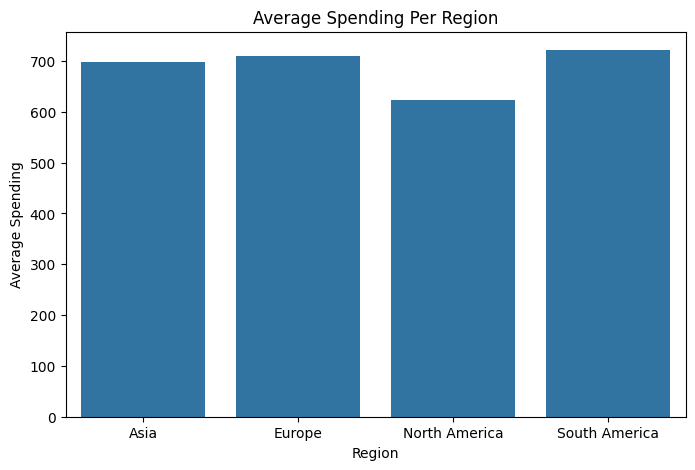

In [9]:
# Merge the datasets
merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_df = pd.merge(merged_df, products, on='ProductID', how='left')

# 1. Number of customers by region
region_count = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_count.index, y=region_count.values)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# 2. Top 10 most purchased products
top_products = transactions['ProductID'].value_counts().head(10)
top_products = top_products.rename(index=products.set_index('ProductID')['ProductName'])
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Quantity')
plt.ylabel('Product Name')
plt.show()

# 3. Sales trends over time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
sales_trend = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line')
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

# 4. Total revenue by product category
merged_data = pd.merge(transactions, products, on='ProductID')
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

# 5. Average spending per region
region_spending = pd.merge(transactions, customers, on='CustomerID').groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_spending.index, y=region_spending.values)
plt.title('Average Spending Per Region')
plt.xlabel('Region')
plt.ylabel('Average Spending')
plt.show()

 Creating PDF for Business Insights


In [27]:
!pip install fpdf

from google.colab import files
from fpdf import FPDF


# Create PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Business Insights from EDA", ln=2, align="C")


insights = [
    """
Insight 1: Regional Customer Distribution

The bar plot "Number of Customers by Region" visualizes the customer base across different regions. Understanding the distribution of customers geographically is crucial for targeted marketing campaigns and inventory management. Regions with a higher concentration of customers could benefit from increased marketing efforts, tailored product offerings, or more physical store locations. Conversely, regions with lower customer counts might require different strategies, such as online promotions or partnerships with local businesses to expand reach. Further analysis could segment these regions based on demographics and purchasing behavior for more granular insights. This information enables resource allocation and strategic planning to optimize customer acquisition and retention in each area.
""",
    """
Insight 2: Top Performing Products

The "Top 10 Most Purchased Products" bar plot highlights best-selling items. This provides valuable information for inventory management, identifying products that generate the highest revenue and customer demand. Prioritize stocking and promotion of these products to maximize sales and potentially drive further revenue. Conversely, investigate underperforming products – those not appearing in the top 10. Determine if these items are obsolete, poorly marketed, or priced inappropriately. Consider discontinuing or re-evaluating these underperformers. Analyzing the sales trends of top products over time will further illuminate their popularity and potential seasonality.
""",
    """
Insight 3: Sales Performance over Time

The "Sales Trend Over Time" line plot reveals sales fluctuations over time. Analyzing this trend helps identify seasonal patterns, growth periods, and potential dips in sales. Understanding these trends allows for proactive adjustments in marketing strategies, inventory levels, and staffing. For instance, if sales consistently dip during certain months, promotional campaigns or discounts could be implemented to stimulate demand. Identifying consistent upward trends indicates successful strategies and potential opportunities for further growth. A deeper analysis could link these trends to external factors like economic conditions or competing businesses.
""",
    """
Insight 4: Category-wise Revenue Performance

The "Total Revenue by Product Category" bar plot showcases the revenue contribution of each product category. This is crucial for understanding which categories are the most profitable and deserve focused attention in terms of marketing and product development. Prioritize the categories with the highest revenue generation. Invest resources in expanding their product lines, improve marketing efforts, and potentially offer bundle deals within the high performing categories. Conversely, categories with lower revenue generation require more scrutiny. Determine if these underperformers are due to pricing, marketing, or lack of demand. Consider strategies like repositioning, price adjustments, or discontinuing them.
""",
    """
Insight 5: Regional Spending Habits

The "Average Spending Per Region" bar plot indicates regional variations in customer spending. This allows for tailored pricing strategies, targeted promotions, and understanding of regional purchasing power. Regions with higher average spending may be receptive to premium products or higher prices. Those with lower average spending could benefit from promotional offers, loyalty programs or more budget-friendly product lines. Further segmentation within each region by demographics and product preference could help craft hyperlocal strategies. This customer behavior understanding enables more effective resource allocation and product offerings, maximizing profits in each area.
"""
]

for insight in insights:
    pdf.multi_cell(0, 10, insight.encode('utf-8').decode('latin-1', 'ignore'))


pdf.output("Goddati_Bhavyasri_EDA.pdf")
files.download("Goddati_Bhavyasri_EDA.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>